# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [2]:
# Import essential libraries for data manipulation and analysis
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [3]:
# Importing the file porter_data_1.csv
df = pd.read_csv('porter_data_1.csv')

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [4]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])



##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [5]:
# Convert categorical features to category type
df['market_id'] = df['market_id'].astype('category')
df['store_primary_category'] = df['store_primary_category'].astype('category')
df['order_protocol'] = df['order_protocol'].astype('category')



#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [6]:
# Calculate time taken in minutes
df['delivery_duration'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [7]:
# Extract the hour and day of week from the 'created_at' timestamp
df['created_hour'] = df['created_at'].dt.hour
df['created_dayofweek'] = df['created_at'].dt.dayofweek

# Create a categorical feature 'isWeekend'
df['isWeekend'] = df['created_dayofweek'].apply(lambda x: 1 if x >= 5 else 0).astype('category')


In [8]:
# Drop unnecessary columns
df.drop(columns=['created_at', 'actual_delivery_time'], inplace=True)

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [9]:
# Define target variable (y) and features (X)
y = df['delivery_duration']
X = df.drop(columns=['delivery_duration'])
X = pd.get_dummies(X, drop_first=True)


##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [10]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [11]:
# Define numerical and categorical columns for easy EDA and data manipulation
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['category']).columns.tolist()


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

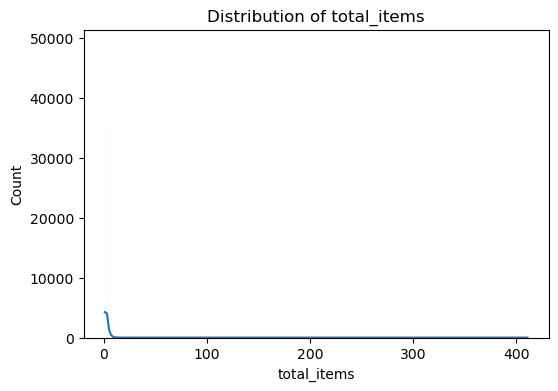

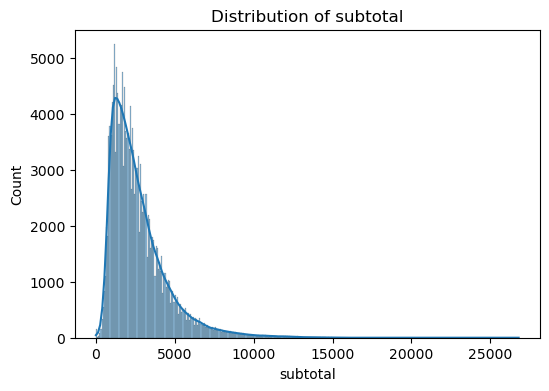

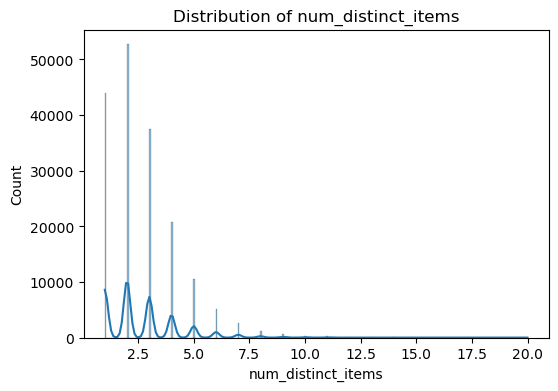

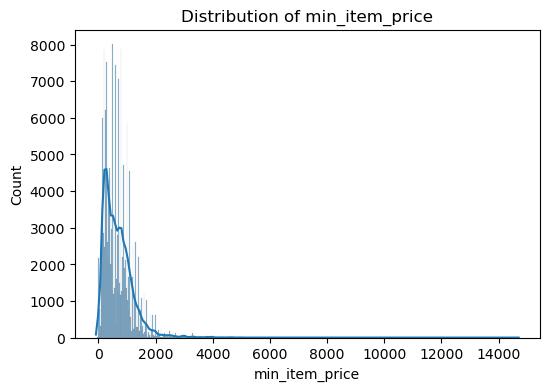

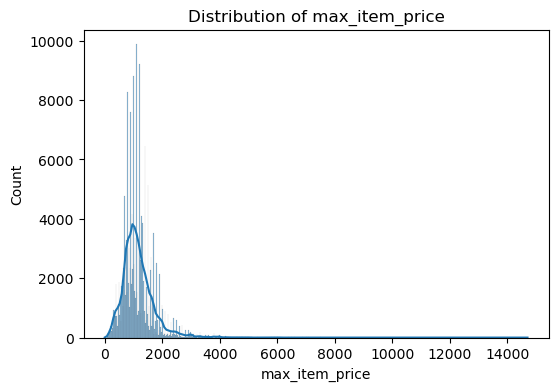

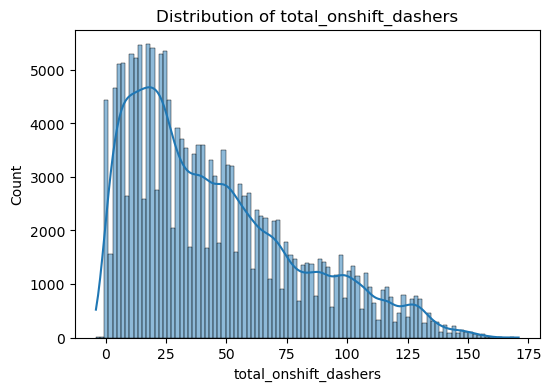

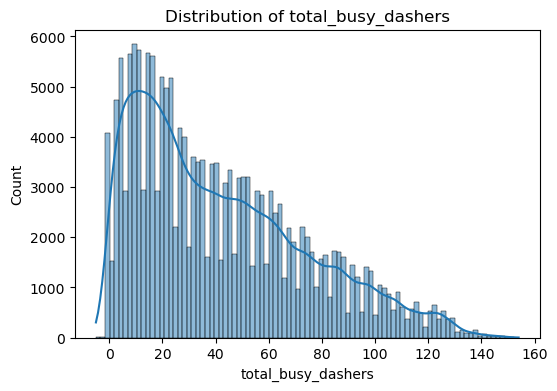

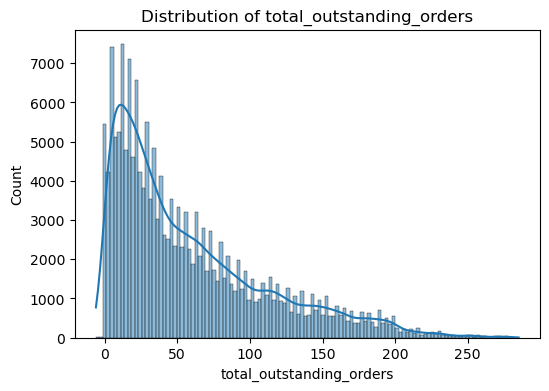

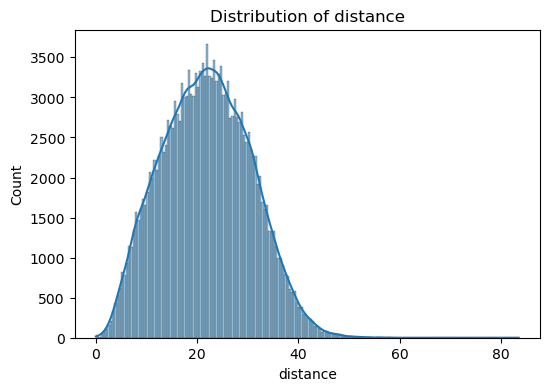

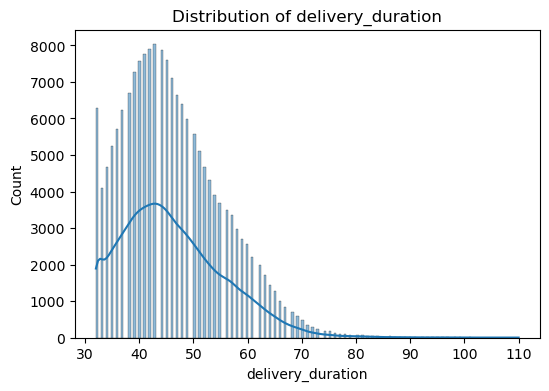

In [12]:
# Plot distributions for all numerical columns
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

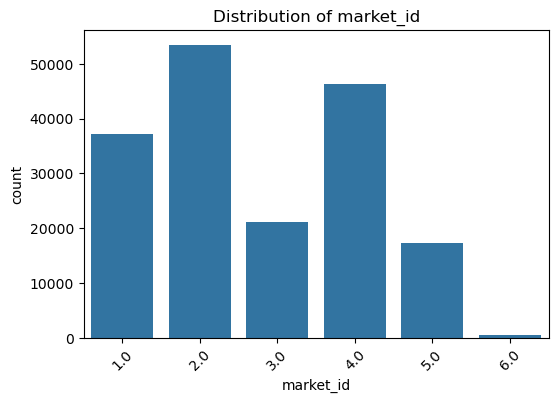

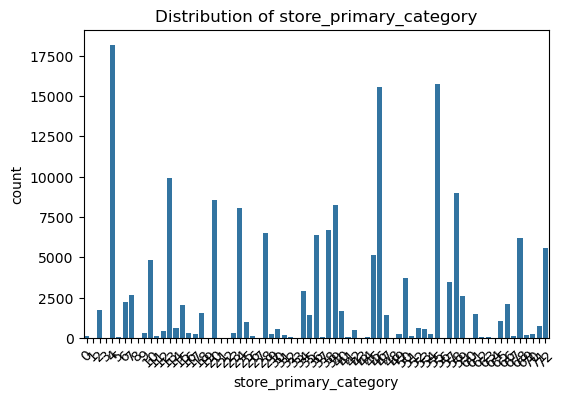

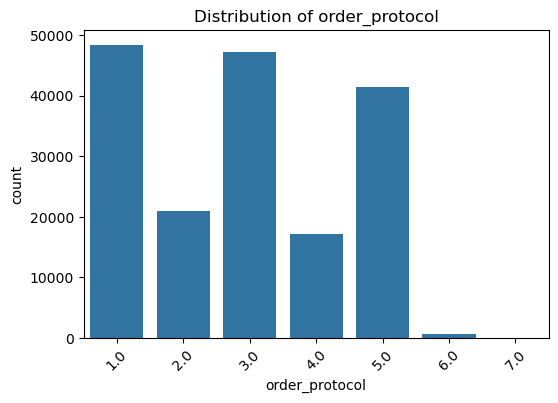

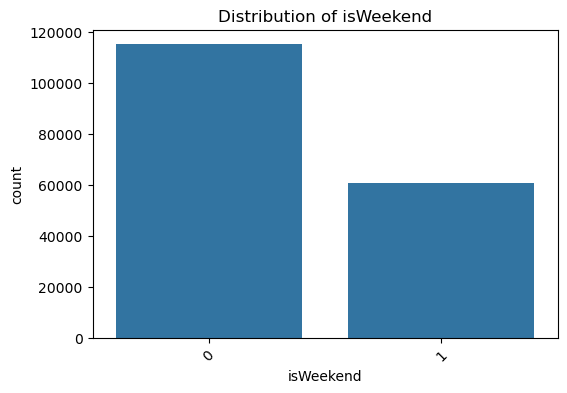

In [13]:
# Distribution of categorical columns
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()


##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

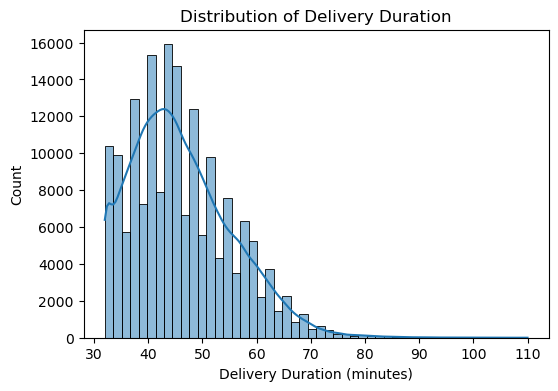

In [15]:
# Distribution of time_taken
plt.figure(figsize=(6, 4))
sns.histplot(df['delivery_duration'], bins=50, kde=True)
plt.title('Distribution of Delivery Duration')
plt.xlabel('Delivery Duration (minutes)')
plt.show()


#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

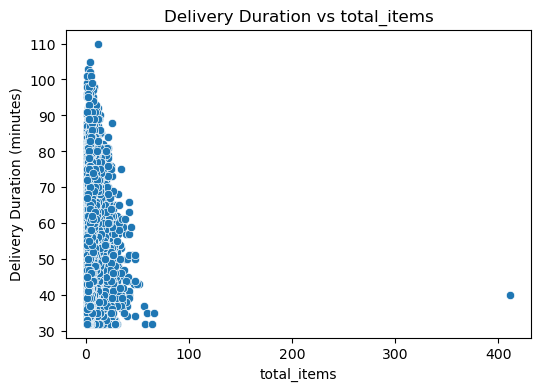

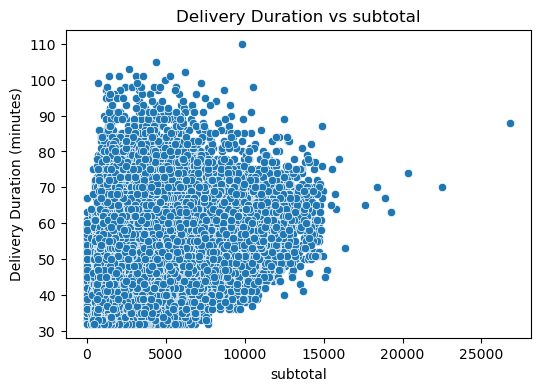

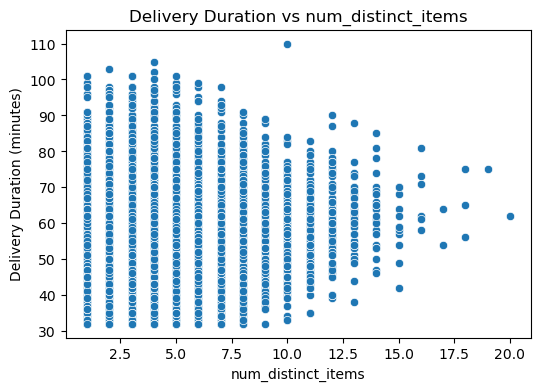

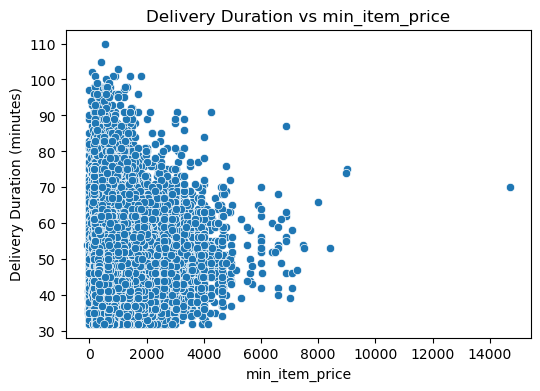

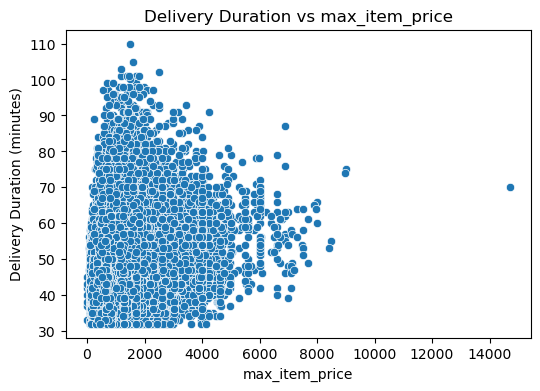

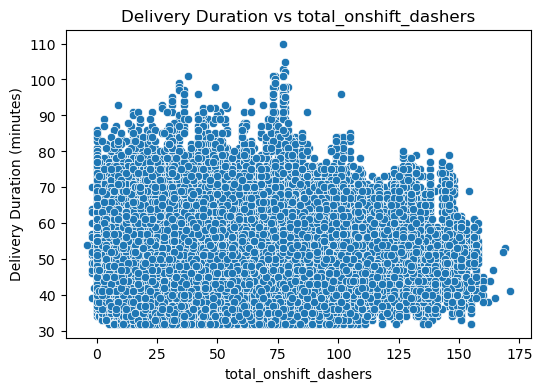

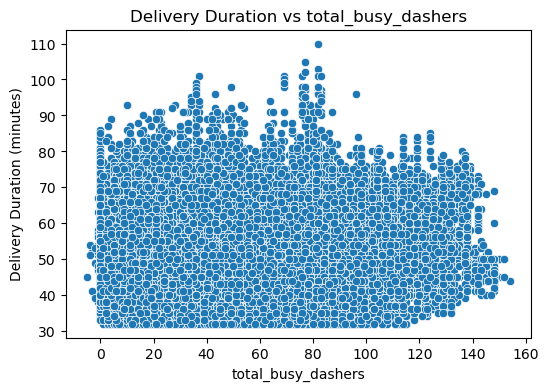

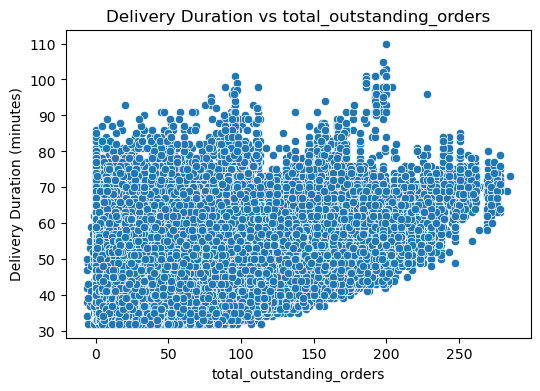

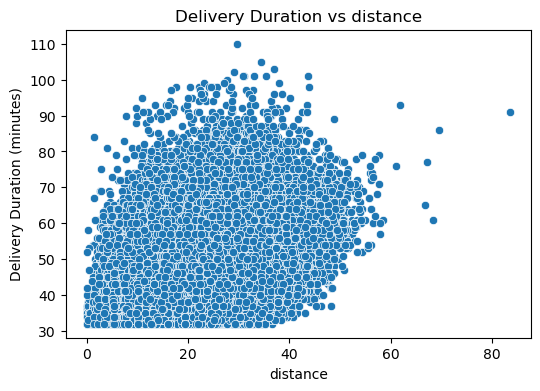

In [16]:
# Scatter plot to visualise the relationship between time_taken and other features
for col in numerical_cols:
    if col != 'delivery_duration':
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=df[col], y=df['delivery_duration'])
        plt.title(f'Delivery Duration vs {col}')
        plt.xlabel(col)
        plt.ylabel('Delivery Duration (minutes)')
        plt.show()


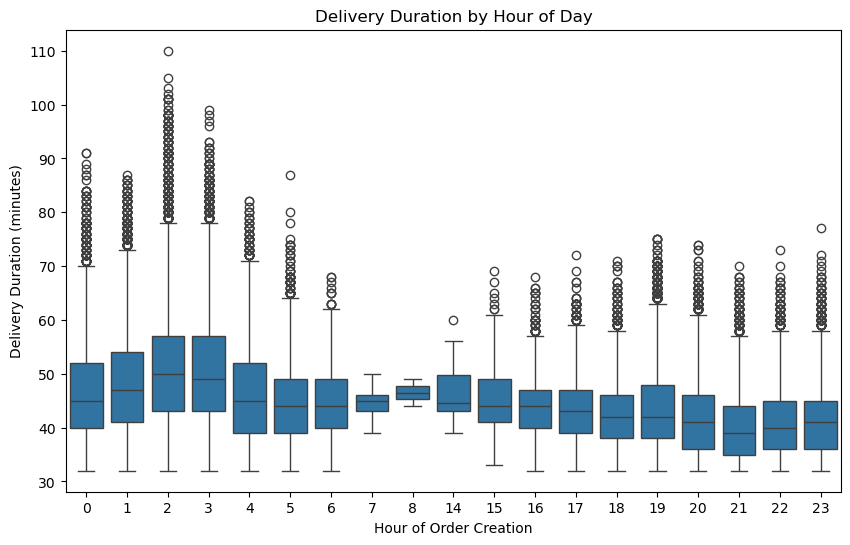

In [17]:
# Show the distribution of time_taken for different hours
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='created_hour', y='delivery_duration')
plt.title('Delivery Duration by Hour of Day')
plt.xlabel('Hour of Order Creation')
plt.ylabel('Delivery Duration (minutes)')
plt.show()










#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

In [18]:
# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [19]:
# Drop 3-5 weakly correlated columns from training dataset
correlation_with_target = corr_matrix['delivery_duration'].abs().sort_values()
weak_features = correlation_with_target[correlation_with_target < 0.1].index.tolist()
drop_columns = weak_features[:5]  # select up to 5
X_train.drop(columns=[col for col in drop_columns if col in X_train.columns], inplace=True)
X_test.drop(columns=[col for col in drop_columns if col in X_test.columns], inplace=True)


#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

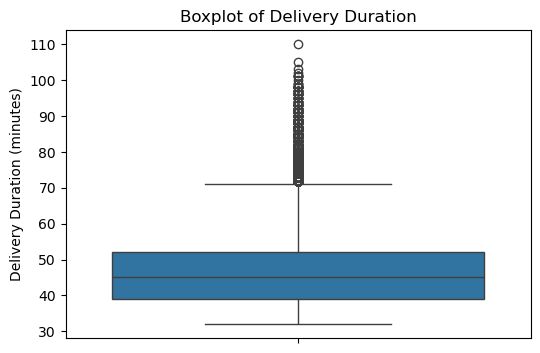

In [20]:
# Boxplot for time_taken
plt.figure(figsize=(6, 4))
sns.boxplot(y=df['delivery_duration'])
plt.title('Boxplot of Delivery Duration')
plt.ylabel('Delivery Duration (minutes)')
plt.show()


##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [21]:
# Handle outliers
Q1 = df['delivery_duration'].quantile(0.25)
Q3 = df['delivery_duration'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df = df[(df['delivery_duration'] >= lower_bound) & (df['delivery_duration'] <= upper_bound)]

# Re-define y and X after outlier removal
y = df['delivery_duration']
X = df.drop(columns=['delivery_duration'])

# One-hot encode again
X = pd.get_dummies(X, drop_first=True)

# Re-split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [22]:
# Define numerical and categorical columns for easy EDA and data manipulation
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['category']).columns.tolist()


#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

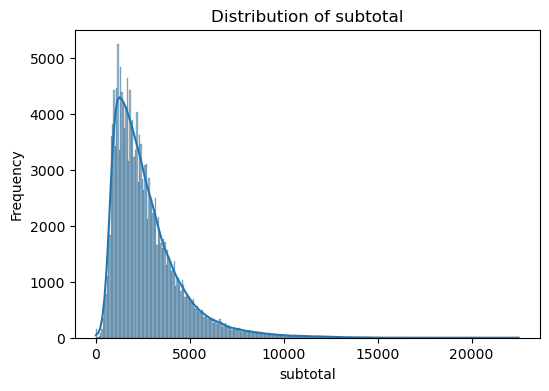

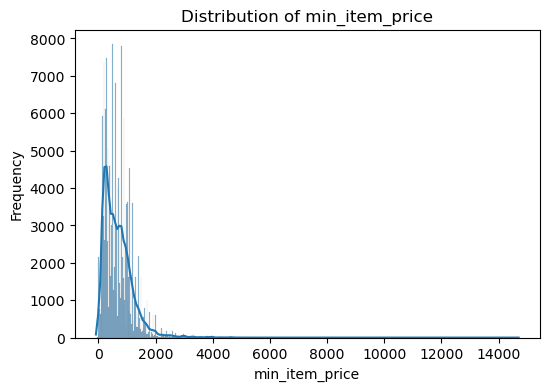

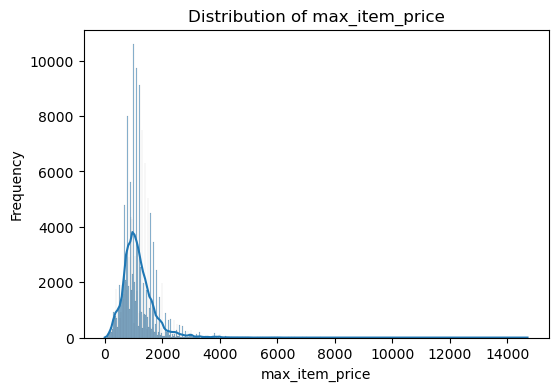

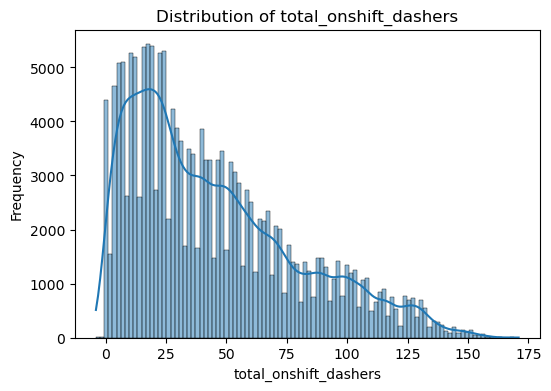

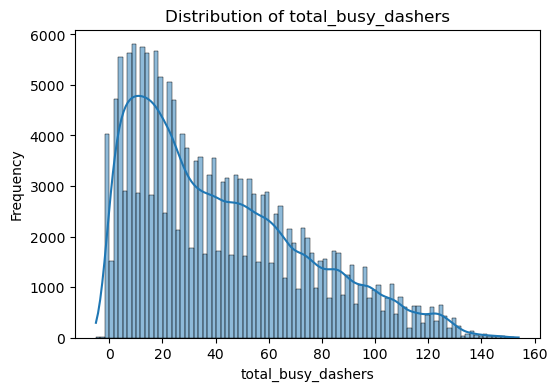

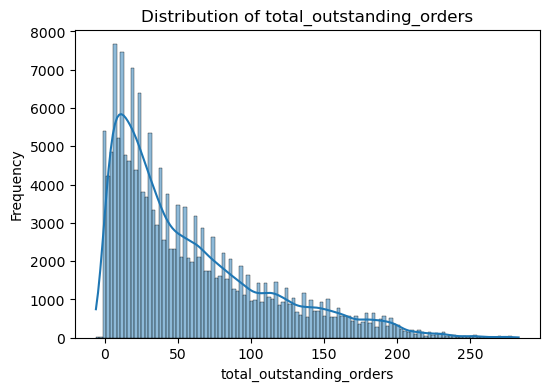

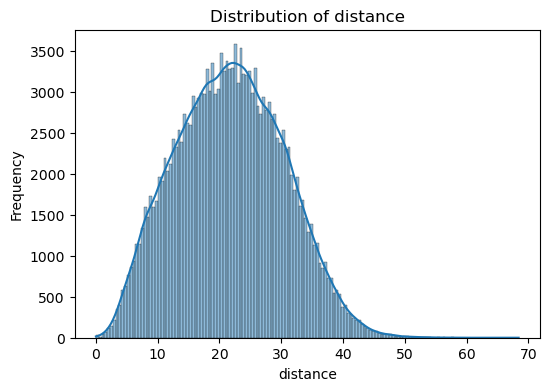

In [23]:
# Plot distributions for all numerical columns
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


##### **4.1.2**
Check the distribution of categorical features

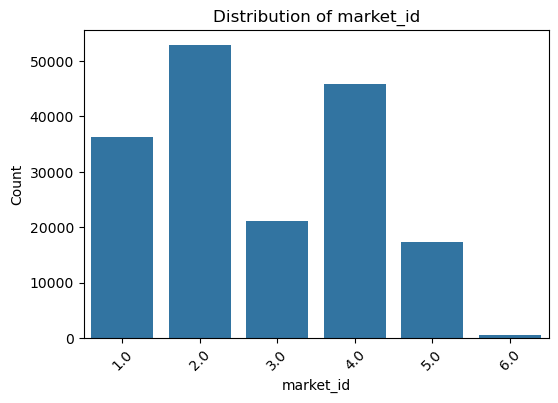

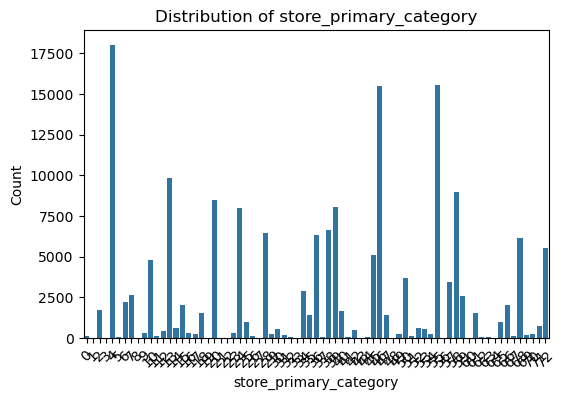

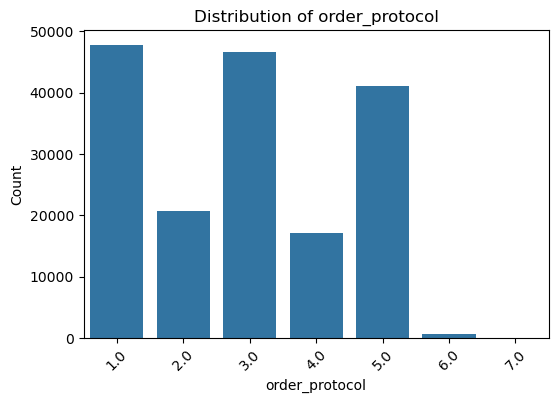

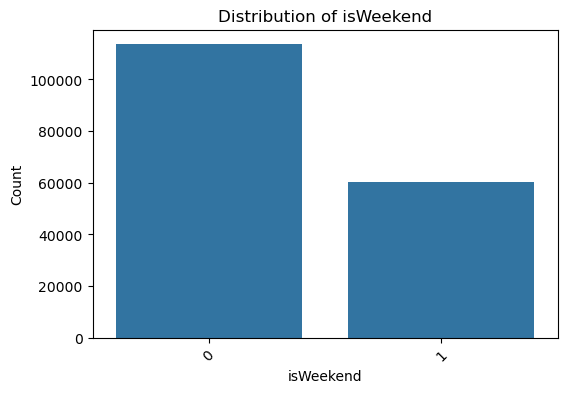

In [24]:
# Distribution of categorical columns
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

In [25]:
# Distribution of time_taken
plt.figure(figsize=(6, 4))
sns.histplot(df['delivery_duration'], bins=50, kde=True)
plt.title('Distribution of Delivery Duration (Time Taken)')
plt.xlabel('Delivery Duration (minutes)')
plt.ylabel('Frequency')
plt.show()


#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

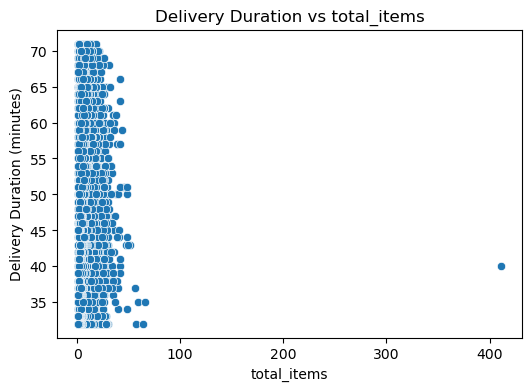

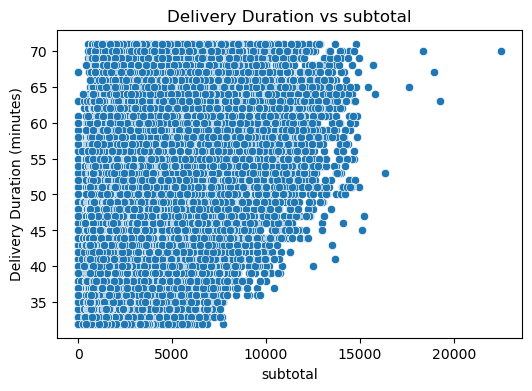

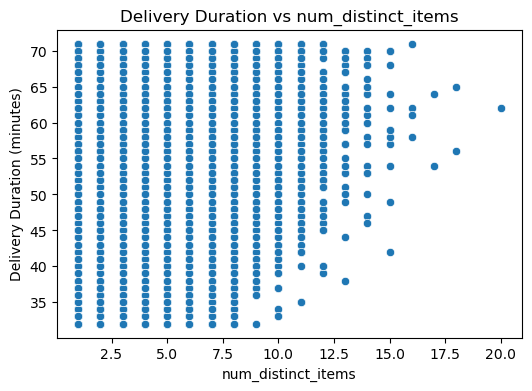

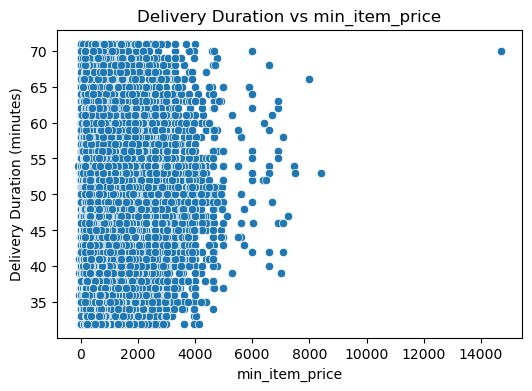

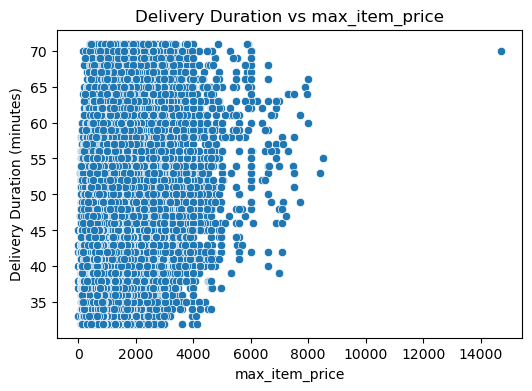

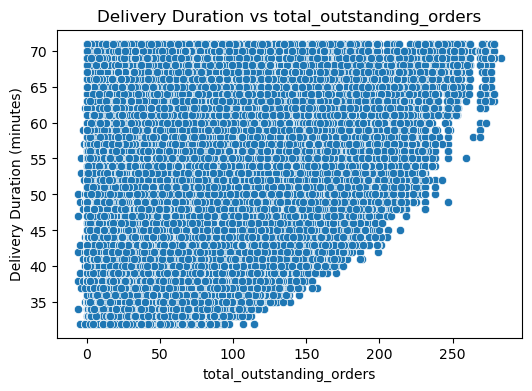

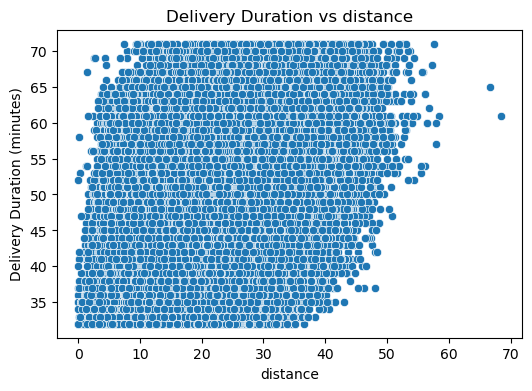

In [26]:
# Scatter plot to visualise the relationship between time_taken and other features
for col in numerical_cols:
    if col != 'delivery_duration':
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=df[col], y=df['delivery_duration'])
        plt.title(f'Delivery Duration vs {col}')
        plt.xlabel(col)
        plt.ylabel('Delivery Duration (minutes)')
        plt.show()


#### **4.3** Drop the columns with weak correlations with the target variable

In [27]:
# Drop the weakly correlated columns from training dataset
corr_matrix = df[numerical_cols].corr()
correlation_with_target = corr_matrix['delivery_duration'].abs().sort_values()
weak_features = correlation_with_target[correlation_with_target < 0.1].index.tolist()
X_train.drop(columns=[col for col in weak_features if col in X_train.columns], inplace=True)
X_test.drop(columns=[col for col in weak_features if col in X_test.columns], inplace=True)

## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [28]:
# Import libraries
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [29]:
# Apply scaling to the numerical columns
scaler = StandardScaler()
numerical_features = [col for col in X_train.columns if X_train[col].dtype in ['int64', 'float64']]
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])


Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [30]:
# Create/Initialise the model
lr_model = LinearRegression()


In [31]:
# Train the model using the training data
lr_model.fit(X_train, y_train)

LinearRegression()

In [32]:
# Make predictions
y_pred = lr_model.predict(X_test)

In [33]:
# Find results for evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R² Score): {r2:.2f}")

Mean Absolute Error (MAE): 1.90
Mean Squared Error (MSE): 7.17
Root Mean Squared Error (RMSE): 2.68
R-squared (R² Score): 0.91


C:\Users\anmol\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [34]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr_model = LinearRegression()
r2_scores = []

for i in range(1, X_train.shape[1] + 1):
    # Step 1: Apply RFE
    rfe = RFE(estimator=lr_model, n_features_to_select=i)
    rfe.fit(X_train, y_train)

    # Step 2: Transform training and test data
    X_train_rfe = rfe.transform(X_train)
    X_test_rfe = rfe.transform(X_test)

    # Step 3: Train a new model
    lr_temp = LinearRegression()
    lr_temp.fit(X_train_rfe, y_train)

    # Step 4: Predict
    y_pred_rfe = lr_temp.predict(X_test_rfe)

    # Step 5: Evaluate
    r2 = r2_score(y_test, y_pred_rfe)
    r2_scores.append((i, r2))

# Display results
for count, score in r2_scores:
    print(f"Features: {count}, R² Score: {score:.4f}")


Features: 1, R² Score: 0.1460
Features: 2, R² Score: 0.4231
Features: 3, R² Score: 0.4231
Features: 4, R² Score: 0.4448
Features: 5, R² Score: 0.6663
Features: 6, R² Score: 0.6663
Features: 7, R² Score: 0.8032
Features: 8, R² Score: 0.8032
Features: 9, R² Score: 0.8172
Features: 10, R² Score: 0.8336
Features: 11, R² Score: 0.8415
Features: 12, R² Score: 0.8417
Features: 13, R² Score: 0.8496
Features: 14, R² Score: 0.8496
Features: 15, R² Score: 0.8496
Features: 16, R² Score: 0.8496
Features: 17, R² Score: 0.8580
Features: 18, R² Score: 0.8580
Features: 19, R² Score: 0.8580
Features: 20, R² Score: 0.8580
Features: 21, R² Score: 0.8580
Features: 22, R² Score: 0.8596
Features: 23, R² Score: 0.8597
Features: 24, R² Score: 0.8597
Features: 25, R² Score: 0.8625
Features: 26, R² Score: 0.8667
Features: 27, R² Score: 0.8667
Features: 28, R² Score: 0.8672
Features: 29, R² Score: 0.8672
Features: 30, R² Score: 0.8681
Features: 31, R² Score: 0.8681
Features: 32, R² Score: 0.8682
Features: 33, R² 

In [35]:
# Build the final model with selected number of features
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr_model = LinearRegression()
selected_features = 56

final_rfe = RFE(estimator=lr_model, n_features_to_select=selected_features)
final_rfe.fit(X_train, y_train)

y_pred_final = final_rfe.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred_final))
print("RMSE:", mean_squared_error(y_test, y_pred_final, squared=False))
print("R² Score:", r2_score(y_test, y_pred_final))


MAE: 1.8977601262442796
RMSE: 2.6803829504437897
R² Score: 0.9074313834169313


C:\Users\anmol\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

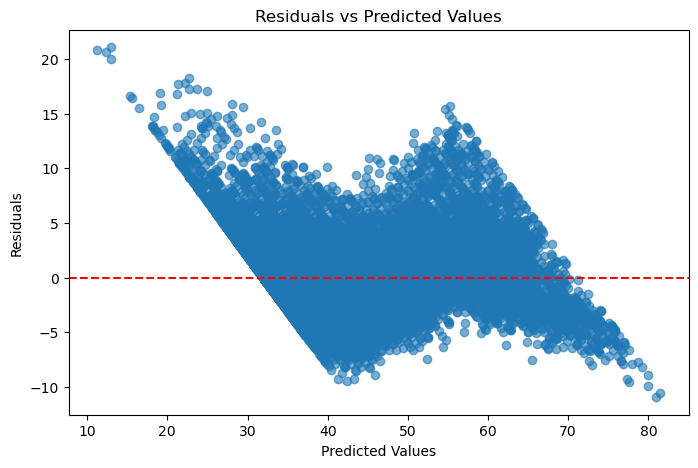

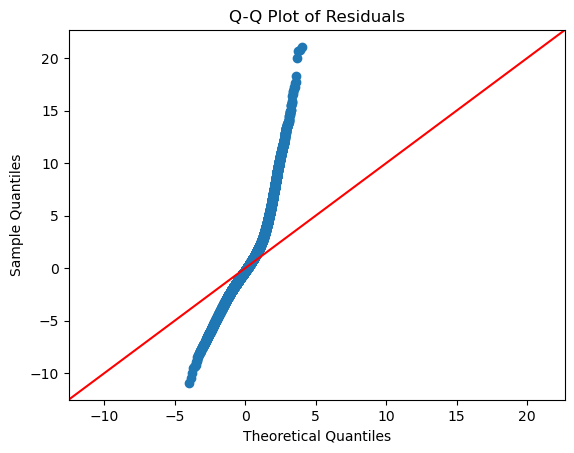

In [36]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram
import statsmodels.api as sm
residuals = y_test - y_pred_final

# 1. Residuals vs Predicted Values plot
plt.figure(figsize=(8,5))
plt.scatter(y_pred_final, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

# 2. Q-Q Plot of Residuals
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

# 3. Histogram of Residuals
plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=30, kde=True, color='skyblue')
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')
plt.show()


[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [44]:
# Get feature names (assuming X_train is a DataFrame)
feature_names = X_train.columns

# Get names of selected features
selected_feature_names = feature_names[selected_mask]

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Feature': selected_feature_names,
    'Scaled Coefficient': scaled_coefs,
    'Unscaled Coefficient': unscaled_coefs
})

# Sort by absolute unscaled effect
comparison_df['|Unscaled|'] = comparison_df['Unscaled Coefficient'].abs()
comparison_df = comparison_df.sort_values(by='|Unscaled|', ascending=False)

comparison_df = comparison_df.drop(columns='|Unscaled|')  # Optional
display(comparison_df.head(10))  # Show top 10 influential features


Feature  Scaled Coefficient  Unscaled Coefficient
6   total_outstanding_orders           17.291160             17.291160
4      total_onshift_dashers          -11.387328            -11.387328
16  store_primary_category_3            0.012777              4.767590
10             market_id_2.0           -2.053990             -4.463748
5         total_busy_dashers           -4.195647             -4.195647
7                   distance            4.178298              4.178298
11             market_id_3.0           -1.305221             -4.006478
12             market_id_4.0           -1.559040             -3.538041
13             market_id_5.0           -0.984018             -3.293051
52        order_protocol_5.0           -1.165631             -2.742406

Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [45]:
# Analyze the effect of a unit change in a feature, say 'total_items'
# Find the effect of 1 unit change in 'total_items'
effect = comparison_df[comparison_df['Feature'] == 'total_items']['Unscaled Coefficient'].values[0]

print(f"Effect of 1 additional item on delivery time: {effect:.2f} minutes")


Effect of 1 additional item on delivery time: -0.10 minutes


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
> Yes, the dataset contains several categorical variables- market_id, store_primary_category, order_protocol. 

From the analysis:
The `store_primary_category` can influence delivery duration as different restaurant types may have different preparation times, which directly affects how quickly an order is ready for pickup.
The `market_id` reflects the geographical region of the store, which could impact delivery time due to factors like local traffic conditions, delivery density, regional operational efficiency.
The `order_protocol` represents how the order was placed, resulting in faster processing and delivery.

##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
The `test_size = 0.2` parameter means that 20% of the dataset will be used as the test set and the remaining 80% will be used for training the model.



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
> Based on the heatmap, the variable `distance` shows the highest positive correlation with the target variable `delivery_duration`, indicating that longer distances generally result in longer delivery times.



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**
> To detect outliers, I used boxplots and statistical methods such as the IQR (Interquartile Range) method. Any data points falling below Q1 - 1.5*IQR or above Q3 + 1.5*IQR were treated as outliers. I handled them by either removing extreme values or capping them to a maximum threshold to reduce their impact on the model.




---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
> From the final linear regression model, the top 3 features significantly affecting delivery time are:
1. distance – longer distances lead to higher delivery duration.
2. total_busy_dashers – more busy dashers may delay new deliveries.
3. subtotal – higher order values might reflect larger/more complex orders requiring more preparation time.



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
> Linear Regression is a supervised machine learning algorithm used for predicting a continuous numeric value based on one or more input features. It models the relationship between independent variables (X) and a dependent variable (Y) using a straight line.

The linear regression equation is:
y = b0 + b1*x1 + b2*x2 + ... + bn*xn + e
Where:
y = target variable (e.g., delivery_duration)
x1, x2, ..., xn = input features
b0 = intercept (constant)
b1, b2, ..., bn = coefficients (slopes)
e = error term (difference between actual and predicted values)

Advantages:
Simple and fast
Easy to interpret
Works well when the data is linearly related

Limitations
Doesn’t work well with non-linear data
Sensitive to outliers
Performance drops if assumptions are violated



---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
Simple linear regression uses one independent variable while multiple linear regression uses two or more.
Simple linear regression fits a straight line in 2D space and multiple linear regression fits a plane or hyperplane in higher dimensions.
Simple linear regression is easier to visualize and interpret than multiple linear regression.
Compaired to simple linear regression, multiple linear regression can capture more complex relationships in the data
Simple regression is used when only one factor influences the target while multiple is used when several factors are involved.



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
The cost function in linear regression measures the error between the predicted values and actual values.
It is usually the Mean Squared Error
Its role is to quantify how well the model fits the data.
The goal is to find the line that minimizes this error.
Minimizing the cost function helps in finding the best values for the model’s coefficients.
A lower cost value means better model performance and more accurate predictions.





---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**
Overfittinghappens when a model learns both the patterns and the noise in the training data.
Underfitting happens when a model is too simple to capture the underlying patterns in the data.
Overfitting shows high accuracy on training data but poor performance on test data.
Underfitting shows poor performance on both training and test data.
Overfitting usually occurs with complex models or when too many features are used.
Underfitting usually occurs with overly simple models or not enough training time.
Overfitting can be reduced by regularization, cross-validation, or simplifying the model.
Underfitting can be reduced by adding features, increasing model complexity, or training longer.




---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
Residual plots show the difference between actual and predicted values (residuals) on the y-axis and predicted values or features on the x-axis.
They help check if the assumptions of linear regression are met.
A good model will have residuals randomly scattered around zero without any clear pattern.
If residuals show a pattern (e.g., curve), it indicates non-linearity or missing variables.
If residuals increase or decrease consistently, it suggests non-constant variance (heteroscedasticity).
Outliers can also be detected using residual plots.
They help in identifying underfitting, overfitting, or violation of regression assumptions.